# Optimization

## Ridge Regression

In [174]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [176]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [177]:
X = cancer.data
Y = cancer.target

In [178]:
Y[1:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [179]:
X[1:10]

array([[2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02, 1.709e+03,
        1.444e-01, 4.245e-01, 4.504e-01, 2.430e-01, 3.613e-01, 8.758e-02],
       [1.142e+01, 2.038e+01, 7.758e+01, 3.861e+02, 1.425e-01, 2.839e-01,
        2.414e-01, 1.052e-01, 2.597e-01, 9.744e-02, 4.956e-01, 1.156e+00,
        3.445e+00, 2.723e+01, 9.110e-03, 7.458e-02, 5.661e-02, 1.867e-02,
        5.963e-02, 9.208e-03, 1.491e

In [180]:
log_r = LogisticRegression()
log_r.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [181]:
log_r.coef_list = log_r.coef_[0].tolist()

In [182]:
pred_Y = log_r.predict(X)

In [183]:
np.mean(pred_Y==Y)

0.9578207381370826

In [184]:
RR = RidgeClassifier(alpha=0.01)

In [185]:
RR.fit(X, Y)

RidgeClassifier(alpha=0.01, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=None, normalize=False,
        random_state=None, solver='auto', tol=0.001)

In [186]:
RR.coef_

array([[ 2.70962810e-01, -1.99904473e-02, -2.68869786e-02,
        -5.52141676e-04,  7.51784333e-01,  6.70081562e+00,
        -2.24514478e+00, -3.78660924e+00, -2.34922271e-01,
         3.05972457e-01, -9.50391185e-01, -3.25337487e-02,
         7.39111506e-03,  3.34830274e-03, -5.15606649e+00,
        -1.39236707e+00,  4.94530386e+00, -4.00371830e+00,
        -2.54634379e+00, -1.35630031e-02, -3.49442568e-01,
        -5.24646094e-03,  7.11490879e-03,  1.75377843e-03,
        -4.16225726e+00, -5.32987896e-02, -6.21848378e-01,
        -2.48894530e+00, -9.96733111e-01, -4.46615638e+00]])

In [187]:
RR.coef_list = RR.coef_[0].tolist()

In [188]:
pred_Y_RR = RR.predict(X)

In [189]:
np.mean(pred_Y_RR==Y)

0.9630931458699473

In [190]:
RR_1 = RidgeClassifier(alpha=1)

In [191]:
RR_1.fit(X, Y)

RidgeClassifier(alpha=1, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [192]:
RR_1.coef_

array([[ 0.35268349, -0.00505749, -0.00595843, -0.00229286, -0.32301781,
         0.1450938 , -0.44452599, -0.58762052, -0.29333272, -0.01697518,
        -0.50099726, -0.034969  ,  0.0064508 ,  0.00135194, -0.11472171,
         0.20512017,  0.51913817, -0.06221854, -0.0711072 ,  0.01848259,
        -0.53031895, -0.01689908,  0.00912682,  0.00266   , -0.75976844,
        -0.05717916, -0.63876249, -0.97916528, -0.7256207 , -0.18483104]])

In [193]:
RR_1.coef_list = RR_1.coef_[0].tolist()

In [194]:
pred_Y_RR_1 = RR_1.predict(X)

In [195]:
np.mean(pred_Y_RR_1==Y)

0.9595782073813708

In [196]:
RR_1.coef_list = RR_1.coef_[0].tolist()

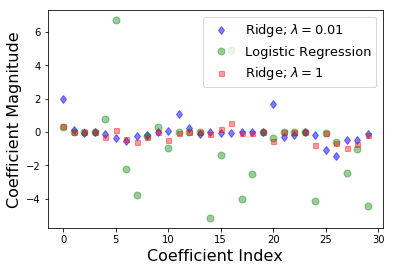

In [197]:
plt.plot(log_r.coef_list,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\lambda = 0.01$') # alpha here is for transparency
plt.plot(RR.coef_list,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Logistic Regression')
plt.plot(RR_1.coef_list,alpha=0.4,linestyle='none',marker='s',markersize=5,color='red',label=r'Ridge; $\lambda = 1$')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='best')
plt.show()

## Principal Componenet Analysis

In [198]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools
import random

In [199]:
f0 = pd.read_csv("./mnist_digit_0.csv", header=None, sep=' ')
f1 = pd.read_csv("./mnist_digit_1.csv", header=None, sep=' ')

Numb_points = [0,f0.shape[0],f1.shape[0]]


In [200]:
f0.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
MNIST_1000 = [f0.iloc[random.sample(range(0,f0.shape[0]),500),:],
               f1.iloc[random.sample(range(0,f1.shape[0]),500),:]]
            

In [202]:
#MNIS_full = [f0[], f1, f2, f3, f4, f5, f6, f7, f8, f9]
result = pd.concat(MNIST_1000)

#result=result.transpose()shape
type(result)

pandas.core.frame.DataFrame

In [203]:
result.shape

(1000, 784)

In [204]:
pca = PCA(n_components=2)
pca.fit(result)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [205]:
Tr = pca.transform(result)

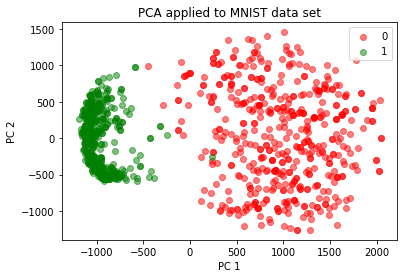

In [206]:
#plt.scatter(Tr[:,0],Tr[:,1],color =K)
plt.scatter(Tr[0:500, 0], Tr[0:500, 1], color='red', label='0', alpha = 0.5)
plt.scatter(Tr[501:1000, 0], Tr[501:1000, 1], color='green', label='1', alpha = 0.5)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA applied to MNIST data set")
plt.legend(loc='best')

In [207]:
pca2 = PCA(n_components=15)
pca2.fit(result)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [208]:
var_exp = pca2.explained_variance_ratio_

In [209]:
var_exp

array([0.3223638 , 0.08989978, 0.07965987, 0.05837546, 0.04082079,
       0.03071679, 0.02569733, 0.0223735 , 0.01944732, 0.01597541,
       0.01492631, 0.01377916, 0.01236058, 0.01158444, 0.01013748])

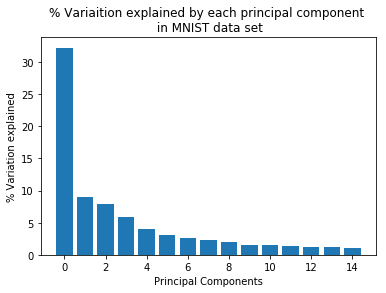

In [210]:
bar = plt.bar(range(15),var_exp*100,width=0.8)
plt.xlabel("Principal Components")
plt.ylabel("% Variation explained")
plt.title("% Variaition explained by each principal component \n in MNIST data set")
LABELS = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']